In [102]:
import tensorflow as tf
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))
# Num of GPUs available:  13
import os

Num of GPUs available:  13


2022-11-26 22:39:24.425827: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 15389 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:06:00.0, compute capability: 6.0


In [103]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [104]:
os.getcwd()

'/users/sbataju/CS5324/tomato'

In [105]:

import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
from sklearn import metrics as mt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
# import seaborn as sns
from skimage.io import imshow
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.utils import plot_model
from skimage.transform import resize
# import pandas as pd

In [106]:

import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import average 
from tensorflow.keras.models import  Model


In [107]:
from PIL import Image
plt.style.use('ggplot')

In [108]:
EPOCHS = 10
INIT_LR = 1e-4
#to avoid cr4shing due to less ram
BS = 256
default_image_size = tuple((128,128))
width=128
height=128
depth=3
inputShape=(128,128,3)
img_wh = 128

# def summarize_net(net, X_test, y_test, title_text=''):
#     plt.figure(figsize=(15,5))
#     yhat = np.argmax(net.predict(X_test), axis=1)
#     acc = mt.accuracy_score(y_test,yhat)
#     cm = mt.confusion_matrix(y_test,yhat)
#     cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
#     sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
#     plt.title(title_text+'{:.4f}'.format(acc))

def img_to_np(DIR,flatten=True,newsize = (128,128)):
#     img = mpimg.imread(DIR)
    img = Image.open(DIR)
#     img = Image.fromarray(img)
#     print(img)
#     img = resize(np.asarray(img),(128,128),anti_aliasing=True)
    img = img.resize(newsize)
    
  #canny edge detection by resizing
#   cv_img=mpimg.imread(DIR,0)
#   cv_img=cv2.resize(cv_img,default_image_size)
#   img = np.uint8(cv_img)
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #img = np.uint8((0.2126 * img[:,:,0]) + np.uint8(0.7152 * img[:,:,1]) + np.uint8(0.0722 * img[:,:,2]))
  #flatten it
#     if(flatten):
#         img=np.uint8(img.flatten())
    return np.asarray(img)

In [109]:
TEST_DIR="/users/sbataju/CS5324/tomato/val/"

label={}
index=0
for FOLDER in os.listdir(TEST_DIR):
#     print(FOLDER,index)
    label[index]=FOLDER
    index=index+1
inv_label = {v: k for k, v in label.items()}

NUM_CLASSES = 10
index=0
data=[]
for FOLDER in os.listdir(TEST_DIR):
    print(FOLDER,inv_label[FOLDER])
    for image_dir in os.listdir(TEST_DIR+FOLDER):
        data.append({"x":img_to_np(TEST_DIR+FOLDER+"/"+image_dir),"y":label[inv_label[FOLDER]]})
#         assert False
    index=index+1
    
x,y=[],[]
for obj in data:
    x.append(obj["x"])
    y.append(obj["y"])
x_test = np.array(x)
y_test = np.array([inv_label[i] for i in y],dtype=np.float16)  



Tomato___Tomato_mosaic_virus 0
Tomato___Spider_mites Two-spotted_spider_mite 1
Tomato___Leaf_Mold 2
Tomato___Early_blight 3
Tomato___Target_Spot 4
Tomato___Late_blight 5
Tomato___healthy 6
Tomato___Bacterial_spot 7
Tomato___Tomato_Yellow_Leaf_Curl_Virus 8
Tomato___Septoria_leaf_spot 9


In [110]:
TRAIN_DIR = "/users/sbataju/CS5324/tomato/train/"
index=0
data=[]
for FOLDER in os.listdir(TRAIN_DIR):
    print(FOLDER,'  ',inv_label[FOLDER])
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
      data.append({"x":img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir,flatten=False),"y":label[inv_label[FOLDER]]})
    index=index+1
x,y=[],[]
for obj in data:
    x.append(obj["x"])
    y.append(obj["y"])
x_train = np.array(x)
y_train = np.array([inv_label[i] for i in y],dtype=np.float16)  

y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

Tomato___Tomato_mosaic_virus    0
Tomato___healthy    6
Tomato___Tomato_Yellow_Leaf_Curl_Virus    8
Tomato___Septoria_leaf_spot    9
Tomato___Late_blight    5
Tomato___Early_blight    3
Tomato___Leaf_Mold    2
Tomato___Spider_mites Two-spotted_spider_mite    1
Tomato___Target_Spot    4
Tomato___Bacterial_spot    7


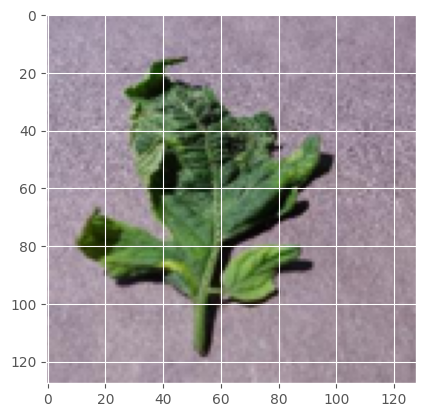

In [111]:
plt.imshow(x[0])
plt.show()

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(
    x_train, y_train_ohe, test_size=0.1, random_state=42,stratify=y_train,)


In [113]:
label

{0: 'Tomato___Tomato_mosaic_virus',
 1: 'Tomato___Spider_mites Two-spotted_spider_mite',
 2: 'Tomato___Leaf_Mold',
 3: 'Tomato___Early_blight',
 4: 'Tomato___Target_Spot',
 5: 'Tomato___Late_blight',
 6: 'Tomato___healthy',
 7: 'Tomato___Bacterial_spot',
 8: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 9: 'Tomato___Septoria_leaf_spot'}

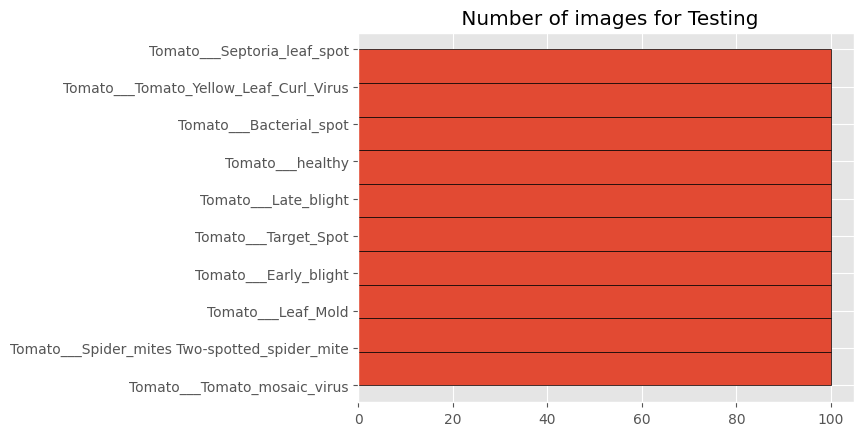

In [114]:
plt.hist(np.argmax(y_test_ohe,axis=-1),histtype='bar', ec='black',orientation="horizontal")
plt.yticks(list(label.keys()),list(label.values()))
plt.title(' Number of images for Testing')
plt.show()

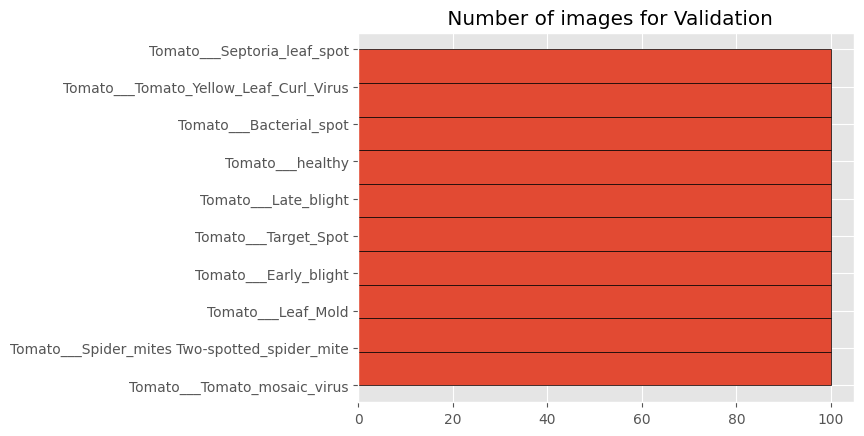

In [115]:
plt.hist(np.argmax(Y_val,axis=-1),histtype='bar', ec='black',orientation="horizontal")
plt.yticks(list(label.keys()),list(label.values()))
plt.title(' Number of images for Validation')
plt.show()

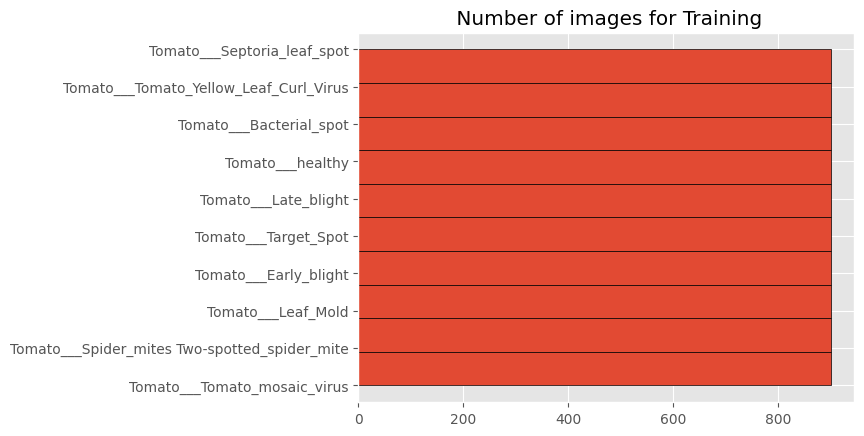

In [116]:
plt.hist(np.argmax(Y_train,axis=-1),histtype='bar', ec='black',orientation="horizontal")
plt.yticks(list(label.keys()),list(label.values()))
plt.title(' Number of images for Training')
plt.show()

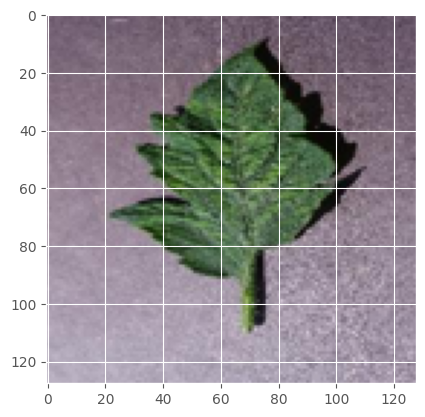

In [121]:
plt.imshow((x[1]/255.0))
plt.show()

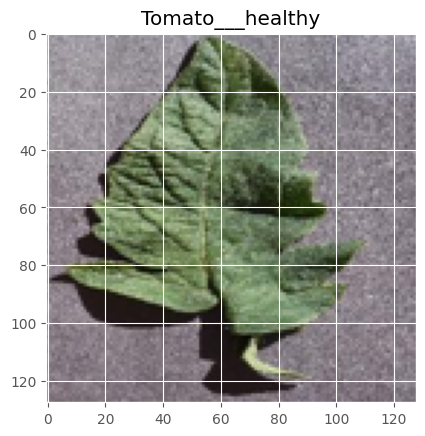

In [122]:
plt.imshow(x_train[1300]/255)
plt.title(label[y_train[1300]])
plt.show()

In [123]:
X_train,X_val =X_train/255.0 , X_val/255.0 
x_test = x_test/255.0
NUM_CLASSES = 10

In [124]:

datagen_train = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=180, # used, Int. Degree range for random rotations.
    width_shift_range=0.2, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.2, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0.1, # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.4,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
#     brightness_range=[0.2,1],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None)


datagen_val = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=180, # used, Int. Degree range for random rotations.
    width_shift_range=0.2, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.2, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0.1, # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.4,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
#     brightness_range=[0.2,1],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None)



In [125]:
img_wh = 128


In [126]:
datagen_train.fit(X_train)
datagen_val.fit(X_val)

In [128]:
tmps = datagen_train.flow(X_train, Y_train, batch_size=1)


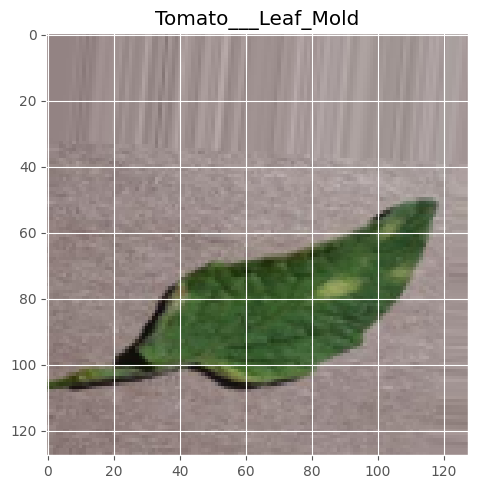

In [131]:

for tmp in tmps:
    imshow(tmp[0].squeeze(),cmap='bone')
    plt.title(label[np.argmax(tmp[1])])
    break

In [136]:
%%time 

cnn = Sequential()

# let's start with an AlexNet style convolutional phase
cnn.add(Conv2D(filters=32,
                input_shape = (img_wh,img_wh,3),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu', data_format="channels_last")) # more compact syntax

# no max pool before next conv layer!!
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(NUM_CLASSES, activation='softmax'))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])
cnn.summary()
# the flow method yields batches of images indefinitely, with the given transformations


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               33554560  
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [152]:
len(X_train)//32

281

In [153]:
BS  = 32
epochs = 5
history = cnn.fit_generator(datagen_train.flow(X_train, Y_train, batch_size=BS), 
                   steps_per_epoch=len(X_train)//BS, # how many generators to go through per epoch
                   epochs=epochs, verbose=1,
                   validation_data=datagen_val.flow(X_val,Y_val, batch_size=BS),
                   validation_steps=len(X_val)//BS,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
                  )

Epoch 1/5
281/281 [==============================] - 44s 157ms/step - loss: 1.1973 - accuracy: 0.6026 - val_loss: 0.7959 - val_accuracy: 0.7329
Epoch 2/5
281/281 [==============================] - 44s 156ms/step - loss: 1.1803 - accuracy: 0.6102 - val_loss: 0.7543 - val_accuracy: 0.7419
Epoch 3/5
281/281 [==============================] - 43s 153ms/step - loss: 1.1510 - accuracy: 0.6228 - val_loss: 0.7812 - val_accuracy: 0.7329
Epoch 4/5
281/281 [==============================] - 43s 153ms/step - loss: 1.1432 - accuracy: 0.6309 - val_loss: 1.0821 - val_accuracy: 0.6250


In [157]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def plot_confusion():
    

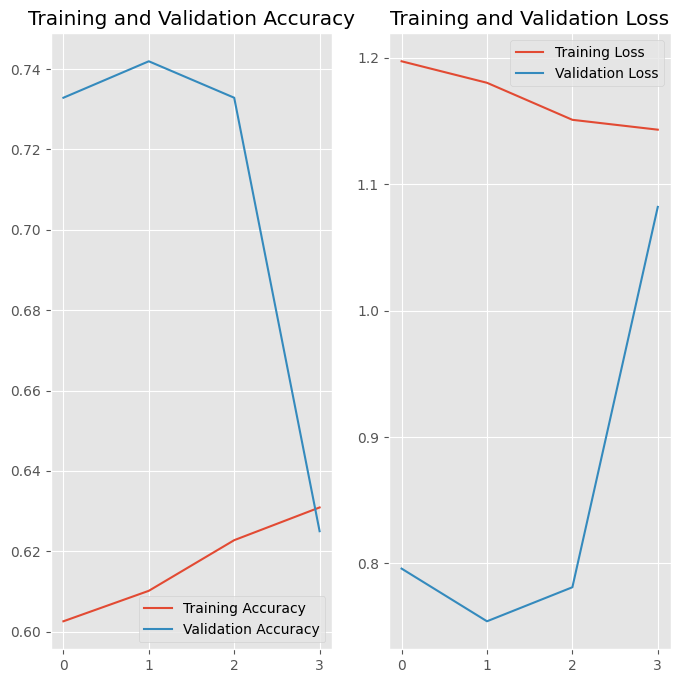

In [158]:
plot_history(history)

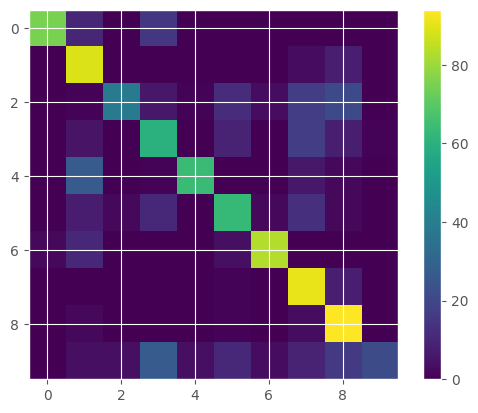

In [159]:
yhat = np.argmax(cnn.predict(x_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
cm = mt.confusion_matrix(y_test,yhat)
plt.imshow(cm)
plt.colorbar()
plt.show()

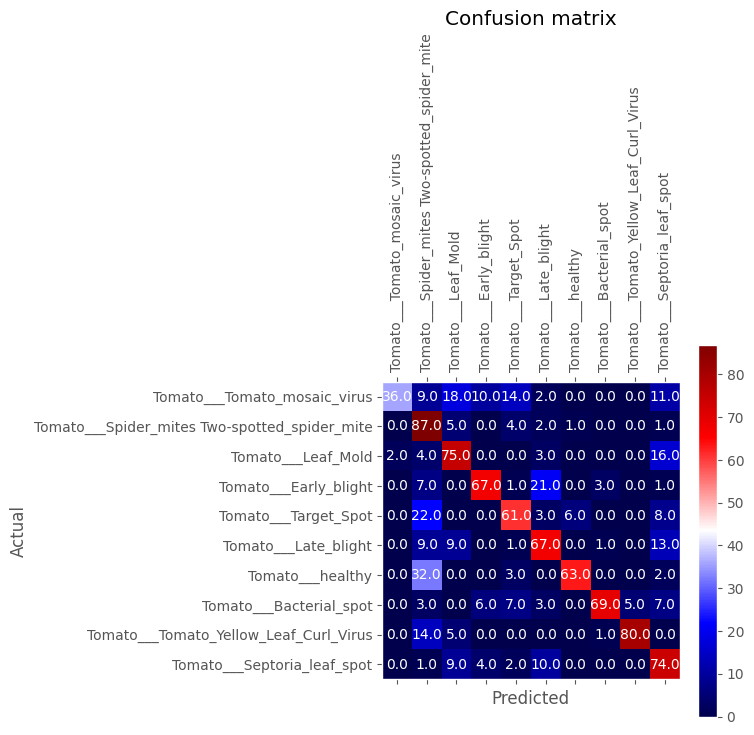

In [189]:


def plot_confusion_matrix(df_confusion,label, title='Confusion matrix', cmap=plt.cm.seismic):
    plt.matshow(df_confusion, cmap=cmap,fignum=10) # imshow
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(label))
    plt.xticks(tick_marks, label, rotation=90)
    plt.yticks(tick_marks,label)
    for (i, j), z in np.ndenumerate(df_confusion):
        plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',color='white')

#     plt.tight_layout()
    plt.grid()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(cm,list(label.values()))

In [178]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 
l2_lambda = 0.0001

# Use Kaiming He to regularize ReLU layers: https://arxiv.org/pdf/1502.01852.pdf
# Use Glorot/Bengio for linear/sigmoid/softmax: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf 
cnn1 = Sequential()

cnn1.add(Conv2D(filters=32,
               input_shape = (img_wh,img_wh,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',
               data_format="channels_last")) # more compact syntax

cnn1.add(Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
cnn1.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn1.add(Conv2D(filters=64,
               input_shape = (img_wh,img_wh,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last")) # more compact syntax

cnn1.add(Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn1.add(Conv2D(filters=128,
               input_shape = (img_wh,img_wh,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last")) # more compact syntax

cnn1.add(Conv2D(filters=128,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
    

# add one layer on flattened output

cnn1.add(Flatten())
cnn1.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn1.add(Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnn1.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn1.add(Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             ))

# Let's train the model 
cnn1.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

cnn1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 128)      

In [190]:
BS  = 32
epochs = 10
history = cnn.fit_generator(datagen_train.flow(X_train, Y_train, batch_size=BS), 
                   steps_per_epoch=len(X_train)//BS, # how many generators to go through per epoch
                   epochs=epochs, verbose=1,
                   validation_data=datagen_val.flow(X_val,Y_val, batch_size=BS),
                   validation_steps=len(X_val)//BS,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=4)],
                  )

/users/sbataju/.conda/envs/tf_gpu/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
281/281 [==============================] - 44s 157ms/step - loss: 0.8625 - accuracy: 0.7575 - val_loss: 0.9423 - val_accuracy: 0.7208
Epoch 2/10
281/281 [==============================] - 43s 153ms/step - loss: 0.8627 - accuracy: 0.7686 - val_loss: 0.6045 - val_accuracy: 0.8427
Epoch 3/10
281/281 [==============================] - 43s 153ms/step - loss: 0.8110 - accuracy: 0.7800 - val_loss: 0.4859 - val_accuracy: 0.8821
Epoch 4/10
281/281 [==============================] - 43s 155ms/step - loss: 0.8158 - accuracy: 0.7837 - val_loss: 0.7169 - val_accuracy: 0.8367
Epoch 5/10
281/281 [==============================] - 44s 157ms/step - loss: 0.7893 - accuracy: 0.7956 - val_loss: 0.7853 - val_accuracy: 0.7621
Epoch 6/10
281/281 [==============================] - 44s 156ms/step - loss: 0.7837 - accuracy: 0.7936 - val_loss: 0.5546 - val_accuracy: 0.8548
Epoch 7/10
281/281 [==============================] - 44s 157ms/step - loss: 0.7900 - accuracy: 0.8005 - val_loss: 0.5966 - val_ac

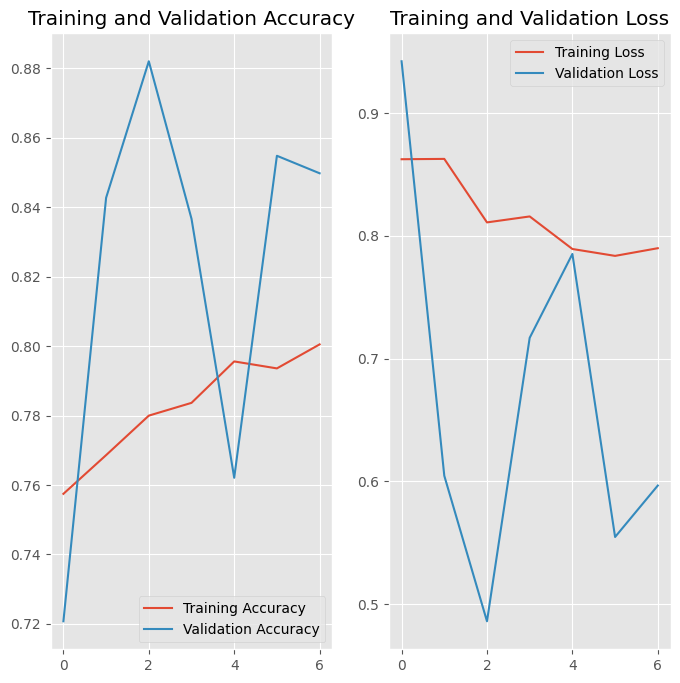

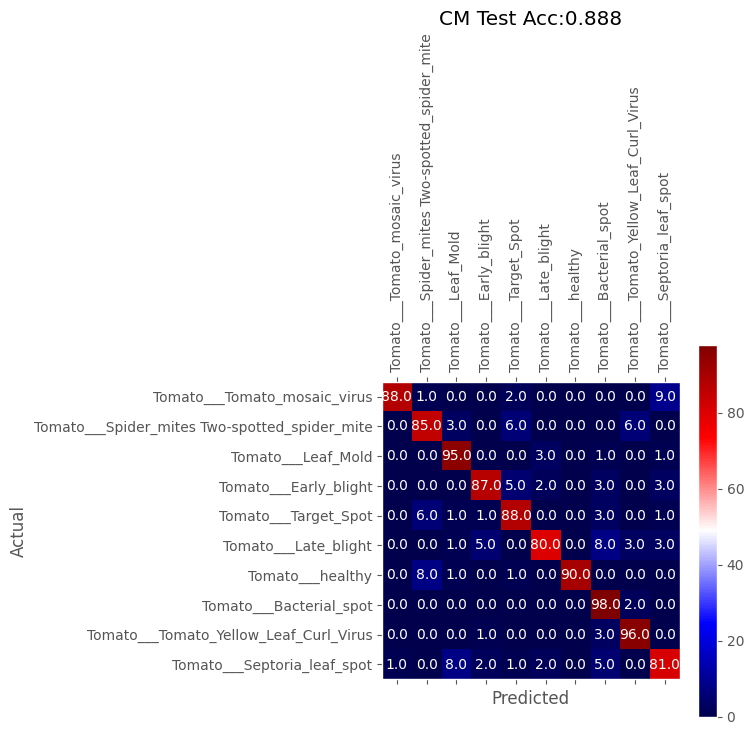

In [191]:
plot_history(history)
yhat = np.argmax(cnn.predict(x_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
cm = mt.confusion_matrix(y_test,yhat)
plot_confusion_matrix(cm,list(label.values()),title= f"CM Test Acc:{acc}")

In [208]:
%%time

from tensorflow.keras.layers import Input, average, concatenate
from tensorflow.keras.models import Model

num_ensembles = 3
l2_lambda = 0.000001

input_holder = Input(shape=(img_wh, img_wh, 3))

# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', data_format="channels_last")(input_holder)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')(x)
input_conv = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

branches = []
for _ in range(num_ensembles):
    
    # start using NiN (MLPConv)
    x = Conv2D(filters=32,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='linear', data_format="channels_last")(input_conv)

    x = Conv2D(filters=32,
                   kernel_size=(1,1),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu', data_format="channels_last")(x)
    
    x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)
    
    x = Conv2D(filters=64,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='linear', data_format="channels_last")(x)

    x = Conv2D(filters=64,
                   kernel_size=(1,1),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='linear', data_format="channels_last")(x)
    
    x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

    # add one layer on flattened output
    x = Flatten()(x)
    x = Dropout(0.50)(x) # add some dropout for regularization after conv layers
    x = Dense(64, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
            )(x)
    
    x = Dense(NUM_CLASSES, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
             )(x)
    
    # now add this branch onto the master list
    branches.append(x)

# that's it, we just need to average the results
x = concatenate(branches)

x = Dense(NUM_CLASSES, 
          activation='softmax', 
          kernel_initializer='glorot_uniform',
          kernel_regularizer=l2(l2_lambda)
         )(x)

# here is the secret sauce for setting the network using the 
#   Functional API:
cnn_ens = Model(inputs=input_holder,outputs=x)

cnn_ens.summary()

cnn_ens.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_55 (Conv2D)              (None, 128, 128, 32) 896         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 128, 128, 32) 9248        conv2d_55[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_28 (MaxPooling2D) (None, 64, 64, 32)   0           conv2d_56[0][0]                  
____________________________________________________________________________________________

In [209]:
BS  = 32
epochs = 10
history = cnn_ens.fit_generator(datagen_train.flow(X_train, Y_train, batch_size=BS), 
                   steps_per_epoch=len(X_train)//BS, # how many generators to go through per epoch
                   epochs=epochs, verbose=1,
                   validation_data=datagen_val.flow(X_val,Y_val, batch_size=BS),
                   validation_steps=len(X_val)//BS,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=4)],
                  )

/users/sbataju/.conda/envs/tf_gpu/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
281/281 [==============================] - 46s 157ms/step - loss: 2.4052 - accuracy: 0.0960 - val_loss: 2.3044 - val_accuracy: 0.1008
Epoch 2/10
281/281 [==============================] - 44s 156ms/step - loss: 2.3046 - accuracy: 0.0938 - val_loss: 2.3044 - val_accuracy: 0.1008
Epoch 3/10
281/281 [==============================] - 43s 155ms/step - loss: 2.3046 - accuracy: 0.0938 - val_loss: 2.3044 - val_accuracy: 0.0998
Epoch 4/10
281/281 [==============================] - 44s 155ms/step - loss: 2.3046 - accuracy: 0.0972 - val_loss: 2.3044 - val_accuracy: 0.0998
Epoch 5/10
281/281 [==============================] - 44s 157ms/step - loss: 2.3046 - accuracy: 0.0969 - val_loss: 2.3044 - val_accuracy: 0.1008
Epoch 6/10
281/281 [==============================] - 44s 155ms/step - loss: 2.3046 - accuracy: 0.0960 - val_loss: 2.3044 - val_accuracy: 0.0998
Epoch 7/10
281/281 [==============================] - 44s 156ms/step - loss: 2.3046 - accuracy: 0.0929 - val_loss: 2.3044 - val_ac

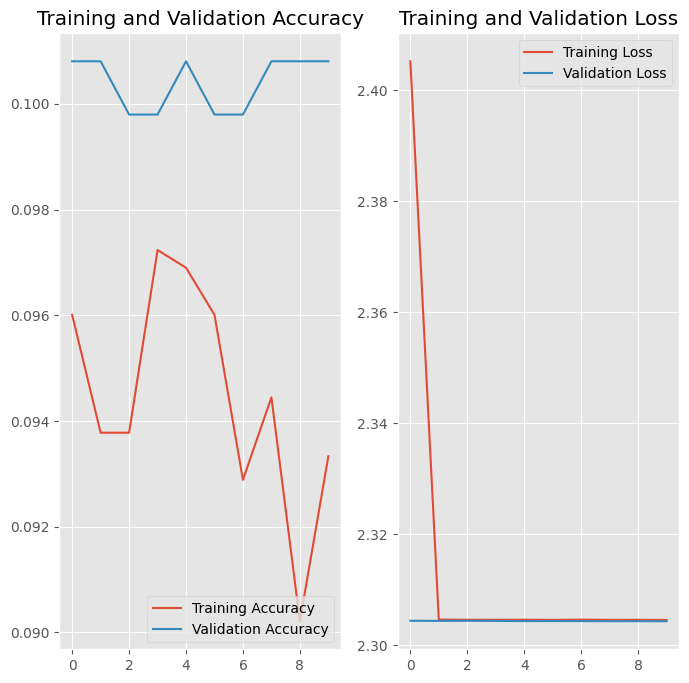

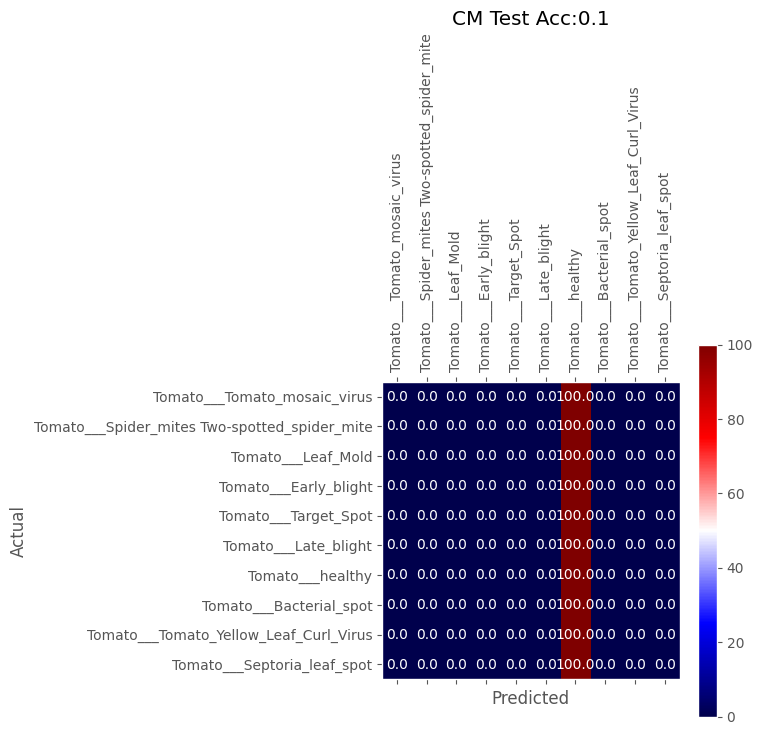

In [210]:
plot_history(history)
yhat = np.argmax(cnn_ens.predict(x_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
cm = mt.confusion_matrix(y_test,yhat)
plot_confusion_matrix(cm,list(label.values()),title= f"CM Test Acc:{acc}")

In [198]:
%%time

# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model

input_holder = Input(shape=(img_wh, img_wh, 3))

# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES)(x)
x = Activation('softmax')(x)

resnet = Model(inputs=input_holder,outputs=x)

resnet.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 128, 128, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_22 (MaxPooling2D) (None, 64, 64, 32)   0           conv2d_48[0][0]                  
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 64, 64, 32)   9248        max_pooling2d_22[0][0]           
____________________________________________________________________________________________

In [201]:
resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

In [202]:
BS  = 32
epochs = 10
history = resnet.fit_generator(datagen_train.flow(X_train, Y_train, batch_size=BS), 
                   steps_per_epoch=len(X_train)//BS, # how many generators to go through per epoch
                   epochs=epochs, verbose=1,
                   validation_data=datagen_val.flow(X_val,Y_val, batch_size=BS),
                   validation_steps=len(X_val)//BS,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=4)],
                  )

Epoch 1/10
281/281 [==============================] - 45s 155ms/step - loss: 2.0744 - accuracy: 0.2510 - val_loss: 1.6277 - val_accuracy: 0.4153
Epoch 2/10
281/281 [==============================] - 43s 154ms/step - loss: 1.4809 - accuracy: 0.4699 - val_loss: 1.2344 - val_accuracy: 0.6139
Epoch 3/10
281/281 [==============================] - 44s 156ms/step - loss: 1.1760 - accuracy: 0.5818 - val_loss: 0.9041 - val_accuracy: 0.6855
Epoch 4/10
281/281 [==============================] - 44s 156ms/step - loss: 1.0116 - accuracy: 0.6365 - val_loss: 0.7864 - val_accuracy: 0.7218
Epoch 5/10
281/281 [==============================] - 43s 154ms/step - loss: 0.8824 - accuracy: 0.6915 - val_loss: 0.6633 - val_accuracy: 0.7802
Epoch 6/10
281/281 [==============================] - 43s 154ms/step - loss: 0.8107 - accuracy: 0.7152 - val_loss: 0.5589 - val_accuracy: 0.8135
Epoch 7/10
281/281 [==============================] - 43s 154ms/step - loss: 0.7394 - accuracy: 0.7419 - val_loss: 0.5958 - val_ac

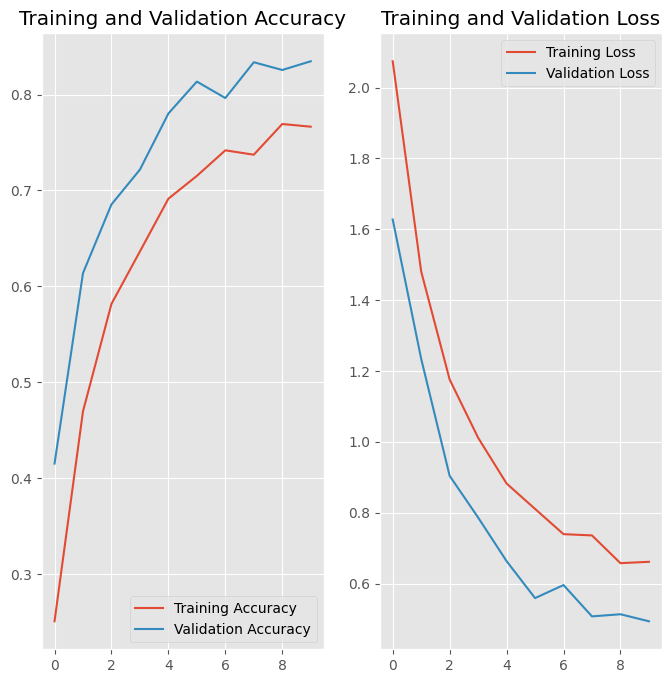

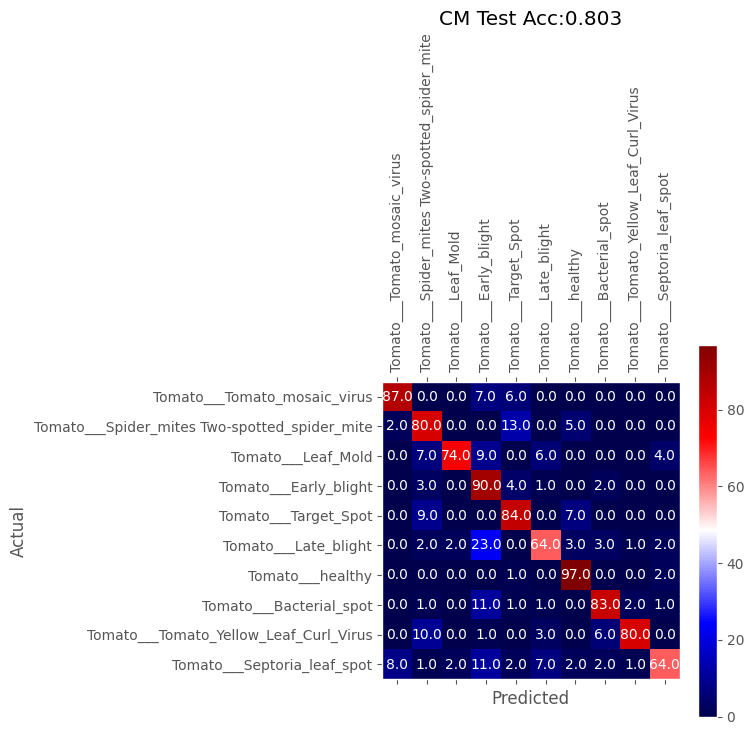

In [203]:
plot_history(history)
yhat = np.argmax(resnet.predict(x_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
cm = mt.confusion_matrix(y_test,yhat)
plot_confusion_matrix(cm,list(label.values()),title= f"CM Test Acc:{acc}")

In [204]:
# Xception style architecture
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model

l2_lambda = 0.000001



input_holder = Input(shape=(img_wh, img_wh, 3))

# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)


x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = SeparableConv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               depth_multiplier = 1, # controls output channels
               data_format="channels_last")(x_split)


x_split = Add()([x, x_split])

x = SeparableConv2D(filters=32,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               depth_multiplier = 1, # controls output channels
               data_format="channels_last")(x_split)


x_split = Add()([x, x_split])


x = Activation("relu")(x_split)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES,activation="softmax")(x)

xception = Model(inputs=input_holder,outputs=x)

xception.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 128, 128, 32) 896         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_25 (MaxPooling2D) (None, 64, 64, 32)   0           conv2d_53[0][0]                  
__________________________________________________________________________________________________
conv2d_54 (Conv2D)              (None, 64, 64, 32)   9248        max_pooling2d_25[0][0]           
____________________________________________________________________________________________

In [205]:
# speed up by training by not using augmentation, perhaps there are faster ways??
xception.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

In [206]:
BS  = 32
epochs = 10
history = xception.fit_generator(datagen_train.flow(X_train, Y_train, batch_size=BS), 
                   steps_per_epoch=len(X_train)//BS, # how many generators to go through per epoch
                   epochs=epochs, verbose=1,
                   validation_data=datagen_val.flow(X_val,Y_val, batch_size=BS),
                   validation_steps=len(X_val)//BS,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=4)],
                  )

/users/sbataju/.conda/envs/tf_gpu/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
281/281 [==============================] - 44s 154ms/step - loss: 2.1719 - accuracy: 0.2045 - val_loss: 1.6673 - val_accuracy: 0.4486
Epoch 2/10
281/281 [==============================] - 43s 154ms/step - loss: 1.3971 - accuracy: 0.5037 - val_loss: 1.0722 - val_accuracy: 0.6210
Epoch 3/10
281/281 [==============================] - 43s 154ms/step - loss: 1.1009 - accuracy: 0.6057 - val_loss: 0.8157 - val_accuracy: 0.6986
Epoch 4/10
281/281 [==============================] - 43s 154ms/step - loss: 0.9545 - accuracy: 0.6603 - val_loss: 0.7059 - val_accuracy: 0.7601
Epoch 5/10
281/281 [==============================] - 43s 153ms/step - loss: 0.8504 - accuracy: 0.7007 - val_loss: 0.7077 - val_accuracy: 0.7480
Epoch 6/10
281/281 [==============================] - 43s 154ms/step - loss: 0.7943 - accuracy: 0.7205 - val_loss: 0.6103 - val_accuracy: 0.7772
Epoch 7/10
281/281 [==============================] - 43s 154ms/step - loss: 0.7450 - accuracy: 0.7404 - val_loss: 0.5198 - val_ac

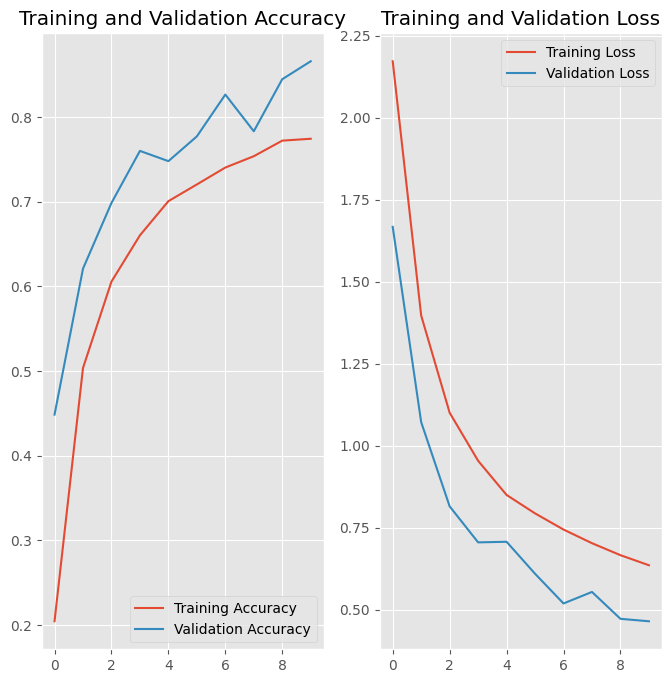

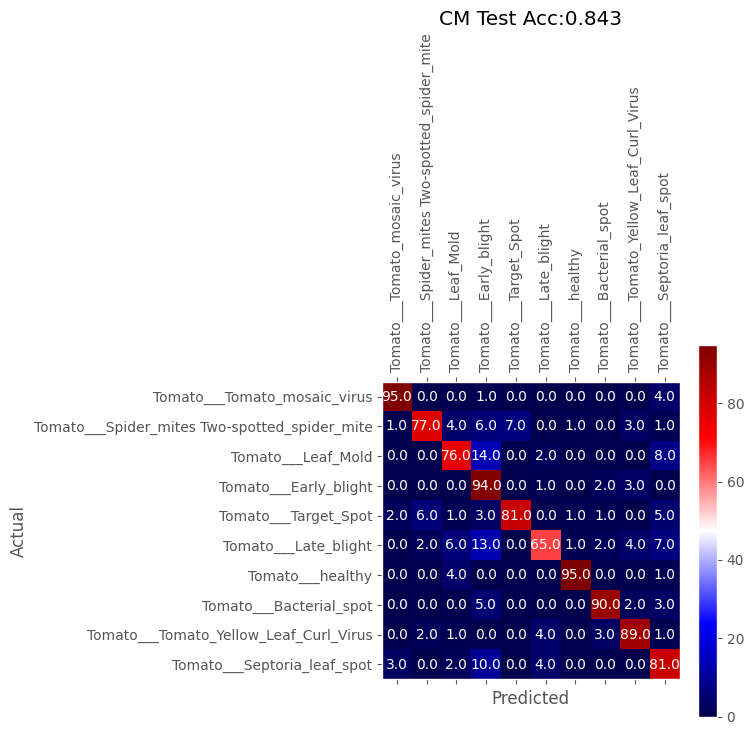

In [207]:
plot_history(history)
yhat = np.argmax(xception.predict(x_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
cm = mt.confusion_matrix(y_test,yhat)
plot_confusion_matrix(cm,list(label.values()),title= f"CM Test Acc:{acc}")

In [160]:
r1,g1,b1 = x_train.copy(),x_train.copy(),x_train.copy()


In [161]:
r1[:,:, :, 1] = 0
r1[:,:, :, 2] = 0
g1[:,:, :, 0] = 0
g1[:,:, :, 2] = 0    
b1[:,:, :, 0] = 0
b1[:,:, :, 1] = 0 

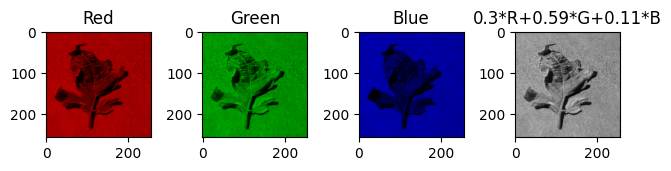

In [165]:

# calculate the grayscale image pixel value from RGB values
gr1 = 0.3*r1[:,:, :,  2]+0.59*g1[:,:, :,  1]+0.11*b1[:,:, :,  0]

plt.subplot(141)
plt.imshow(r1[0])
plt.title("Red")
plt.subplot(142)
plt.imshow(g1[0])
plt.title("Green")
plt.subplot(143)
plt.imshow(b1[0])
plt.title("Blue")
plt.subplot(144)
plt.imshow(gr1[0],cmap=plt.cm.gray)
plt.title("0.3*R+0.59*G+0.11*B")

plt.tight_layout()
plt.show()

In [173]:
gr1_vector = np.array([np.reshape(i,(1,256*256)).ravel() for i in gr1 ])

In [174]:
from sklearn.preprocessing import StandardScaler

gr = gr1_vector.copy()

scaler = StandardScaler()
gr = scaler.fit_transform(gr)

In [175]:
gr.shape

(10000, 65536)

In [176]:
from sklearn.decomposition import PCA

n_components = 200
print ("Extracting the top %d eigenleaf from %d leaf" % (
    n_components, gr.shape[0]))

pca = PCA(n_components=n_components)
pca.fit(gr.copy())
# eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 200 eigenxray from 10000 x-ray


NameError: name 'h' is not defined

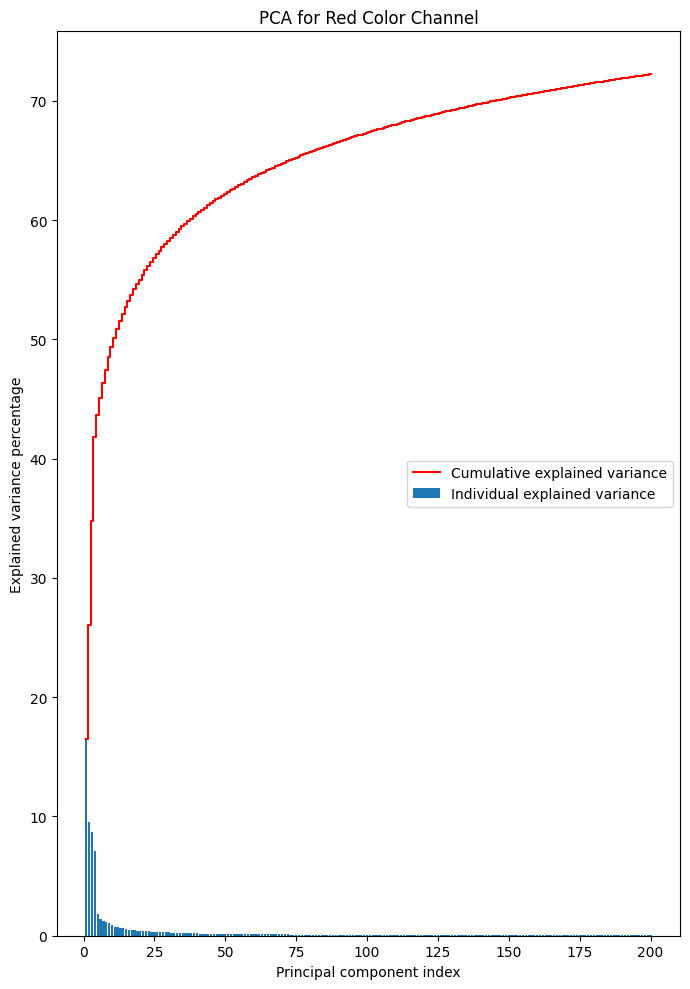

In [182]:

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)


plt.figure(figsize=[7, 10])

plt.bar(range(1, n_components+1), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, n_components+1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.title("PCA for Red Color Channel")
plt.tight_layout()

In [ ]:

r_scaled_vector = np.array([np.reshape(i,(1,256*256)).ravel() for i in r_scaled ])
g_scaled_vector = np.array([np.reshape(i,(1,256*256)).ravel() for i in g_scaled ])
b_scaled_vector = np.array([np.reshape(i,(1,256*256)).ravel() for i in b_scaled ])

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
n_components=150
pca_r = PCA(n_components=n_components)
pca_r.fit(r_scaled_vector)

exp_var = pca_r.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.figure(figsize=[7, 10])

plt.bar(range(1, n_components+1), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, n_components+1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.title("PCA for Red Color Channel")
plt.tight_layout()

In [67]:
r,g,b   = x_train[:,:, :, 0], x_train[:,:, :, 1], x_train[:,:, :, 2]

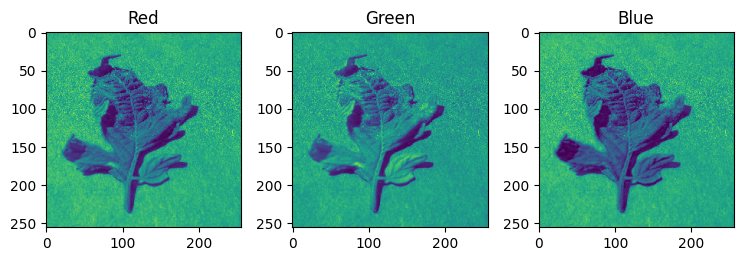

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(r[0])
plt.title("Red")
plt.subplot(142)
plt.imshow(g[0])
plt.title("Green")
plt.subplot(143)
plt.imshow(b[0])
plt.title("Blue")

plt.tight_layout()
plt.show()

In [78]:
r_scaled = r / 255.0
g_scaled = g / 255.0
b_scaled = b / 255.0
r_scaled_vector = np.array([np.reshape(i,(1,256*256)).ravel() for i in r_scaled ])
g_scaled_vector = np.array([np.reshape(i,(1,256*256)).ravel() for i in g_scaled ])
b_scaled_vector = np.array([np.reshape(i,(1,256*256)).ravel() for i in b_scaled ])

256

In [112]:
r_scaled_vector = np.array([np.reshape(i,(1,256*256)).ravel() for i in r_scaled ])
g_scaled_vector = np.array([np.reshape(i,(1,256*256)).ravel() for i in g_scaled ])
b_scaled_vector = np.array([np.reshape(i,(1,256*256)).ravel() for i in b_scaled ])

(10000, 65536)

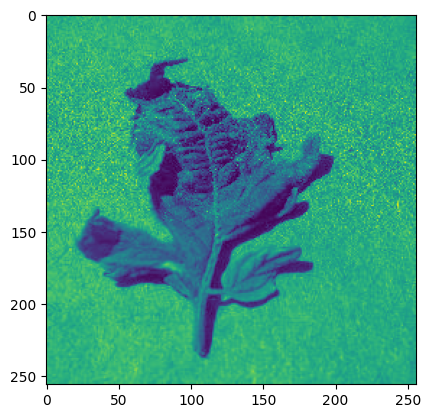

In [101]:
plt.imshow(r_scaled_vector[0].reshape(256,256))

In [ ]:
n_samples, n_features =r_scaled_vector.shape
h, w = 256,256
n_classes = 10


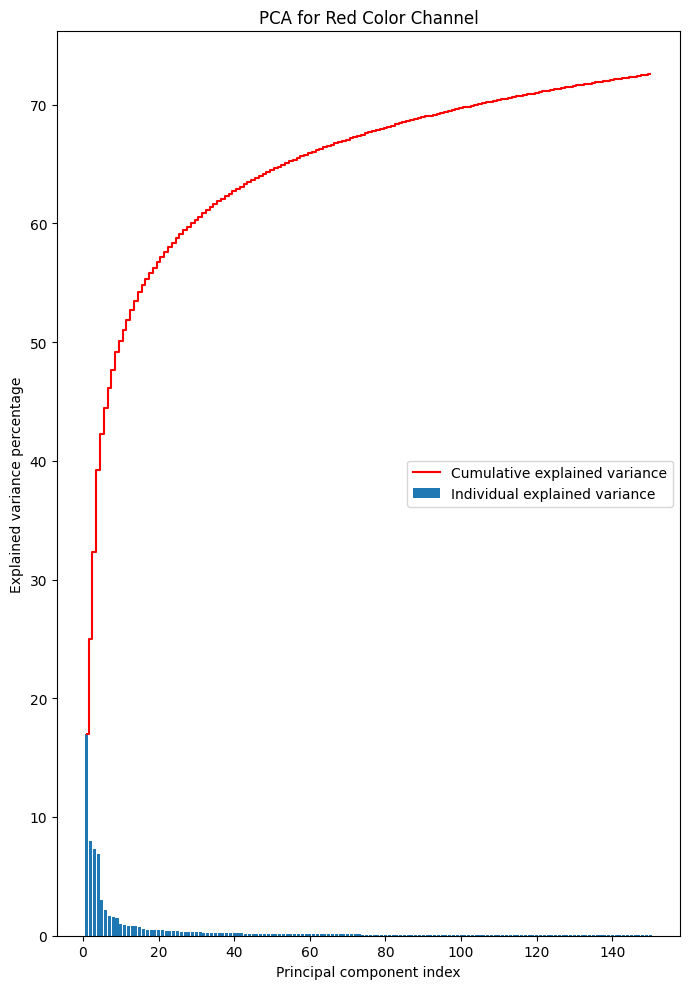

In [106]:
import numpy as np
from sklearn.decomposition import PCA
n_components=150
pca_r = PCA(n_components=n_components)
pca_r.fit(r_scaled_vector)

exp_var = pca_r.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.figure(figsize=[7, 10])

plt.bar(range(1, n_components+1), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, n_components+1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.title("PCA for Red Color Channel")
plt.tight_layout()

In [108]:
print("Red channel")
print(type(r))
print(r.shape)
print("\nGreen channel")
print(type(g))
print(g.shape)
print("\nBlue channel")
print(type(b))
print(b.shape)

Red channel
<class 'numpy.ndarray'>
(10000, 256, 256)

Green channel
<class 'numpy.ndarray'>
(10000, 256, 256)

Blue channel
<class 'numpy.ndarray'>
(10000, 256, 256)


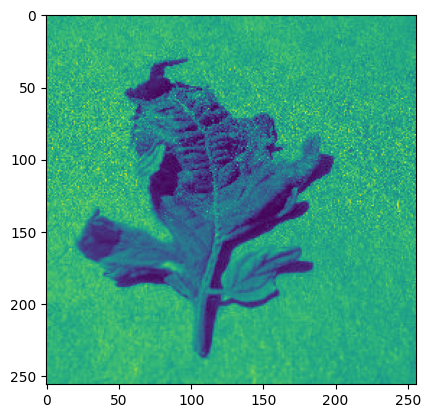

In [110]:
plt.imshow(r[0])

In [157]:
from sklearn.decomposition import PCA

pca_r = PCA(n_components=200)
pca_r_trans = pca_r.fit_transform(r_scaled_vector)

pca_g = PCA(n_components=200)
pca_g_trans = pca_g.fit_transform(g_scaled_vector)

pca_b = PCA(n_components=200)
pca_b_trans = pca_b.fit_transform(b_scaled_vector)


In [159]:

print("Explained variances by each channel")
print("-----------------------------------")
print("Red:", np.sum(pca_r.explained_variance_ratio_ ) * 100)
print("Green:", np.sum(pca_g.explained_variance_ratio_ ) * 100)
print("Blue:", np.sum(pca_b.explained_variance_ratio_ ) * 100)

Explained variances by each channel
-----------------------------------
Red: 74.49479843326208
Green: 71.5641654436529
Blue: 75.7978006088729


In [116]:
pca_r_org = pca_r.inverse_transform(pca_r_trans)
pca_g_org = pca_g.inverse_transform(pca_g_trans)
pca_b_org = pca_b.inverse_transform(pca_b_trans)

In [132]:
img_compressed = cv2.merge((pca_b_org[0], pca_g_org[0], pca_r_org[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


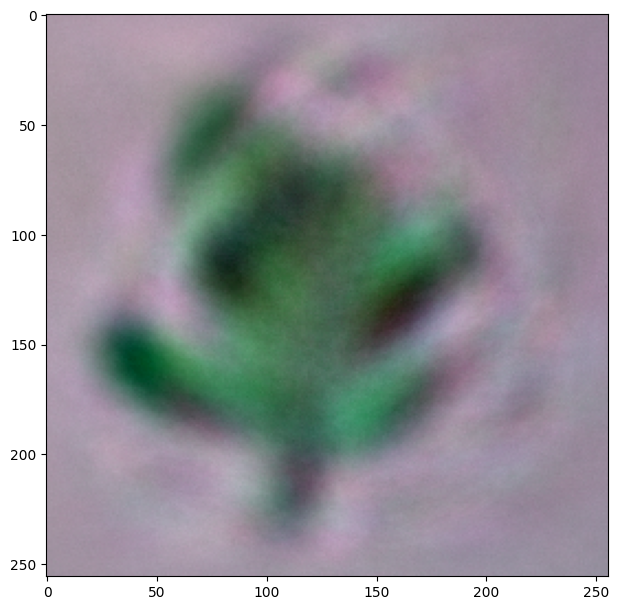

In [140]:
plt.figure(figsize=[7.3, 7.3])
plt.imshow(img_compressed.squeeze().reshape(256,256,3))

In [139]:
img_compressed.squeeze().shape

(65536, 3)

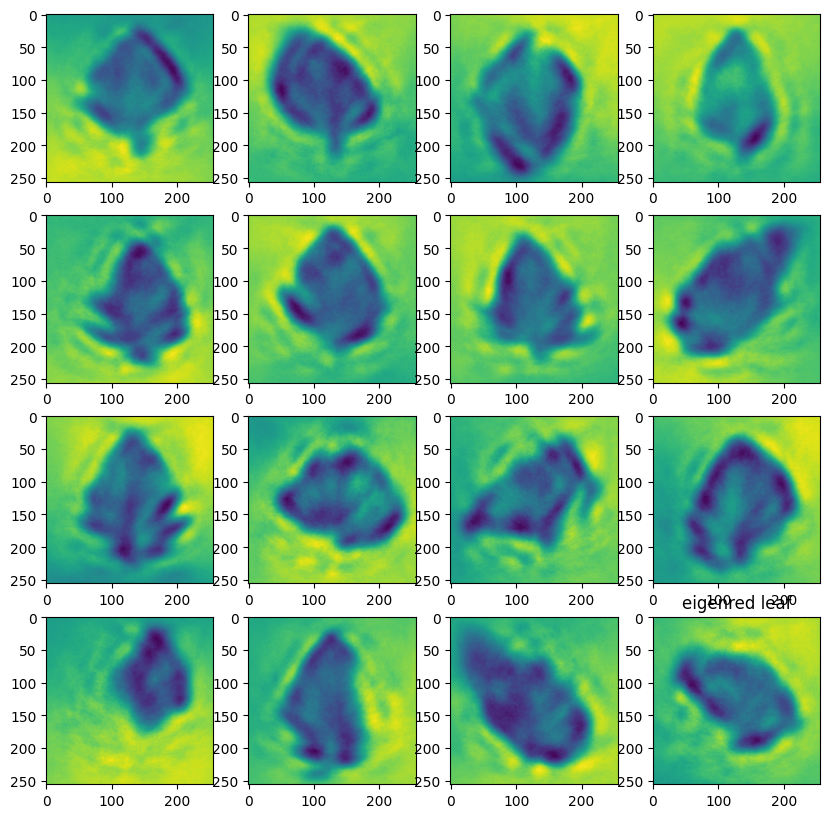

In [155]:
plt.figure(figsize=(10,10))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(pca_r_org[i].reshape(256,256))
plt.title('eigenred leaf')

plt.show()

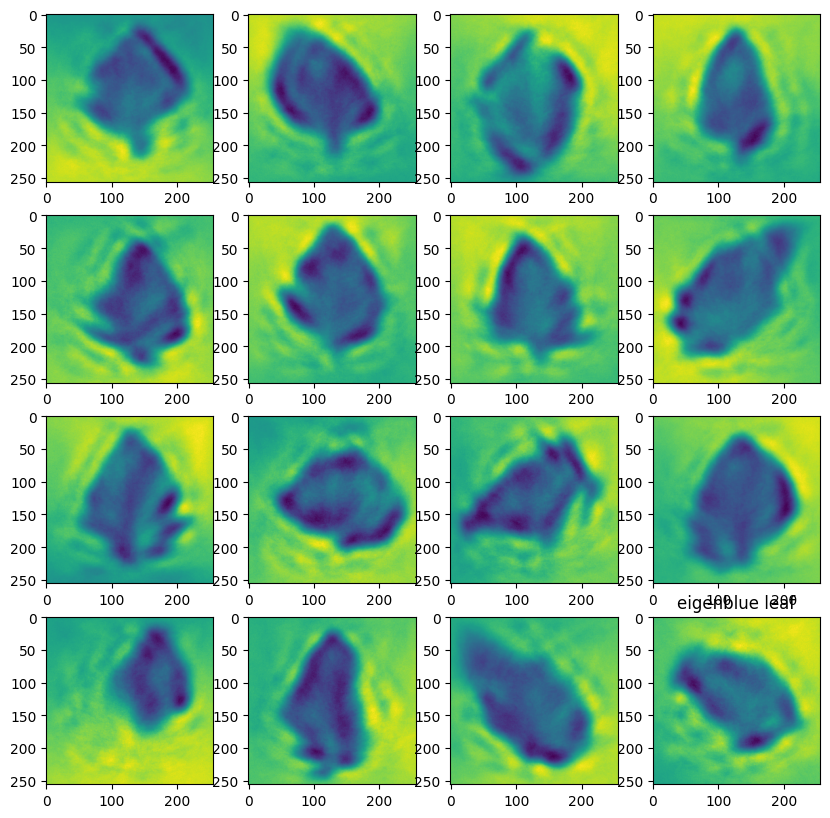

In [156]:
plt.figure(figsize=(10,10))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(pca_b_org[i].reshape(256,256))
plt.title('eigenblue leaf')

plt.show()

In [103]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        

def plot_explained_varieanc(pca,ndem):
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)

    plt.figure(figsize=[10,8])
    plt.bar([f'PCA{i+1}' for i in range(ndem)],explained_var[:ndem],label='individual explained variance')
    plt.plot([f'PCA{i+1}' for i in range(ndem)],cum_var_exp[:ndem],'or--',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel("Principal components")
    plt.legend()
    plt.show()

In [81]:
eigenfaces = pca_r.components_.reshape((16, 16, 100))

IndexError: index 16 is out of bounds for axis 0 with size 16

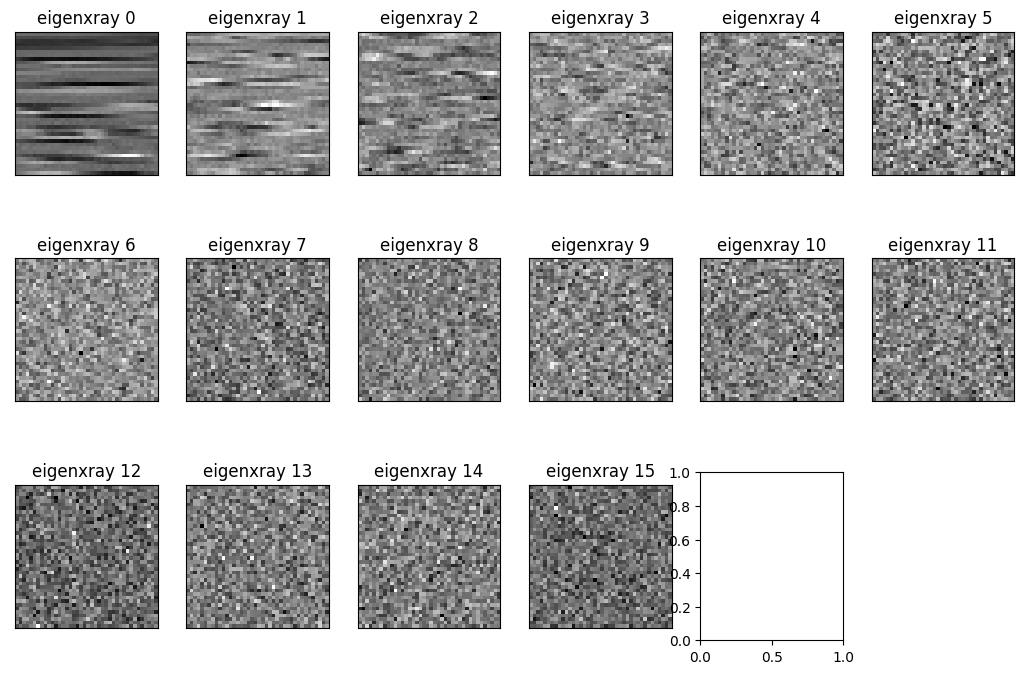

In [84]:
eigenface_titles = ["eigenxray %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 40, 40)

In [74]:
25600/20

1280.0

In [83]:
np.sqrt(1600)

40.0

In [19]:
x_train = x_train/255.0 - 0.5
x_test = x_test/255.0 - 0.5
img_wh = 256
# x_train = np.expand_dims(x_train.reshape((-1,img_wh,img_wh)), axis=3)
# x_test = np.expand_dims(x_test.reshape((-1,img_wh,img_wh)), axis=3)

In [9]:
b = resize(x_train[142],(img_wh,img_wh,3),anti_aliasing=False)

In [10]:
a = resize(x_train[140],(img_wh,img_wh,3),anti_aliasing=True)

(128, 128, 3)


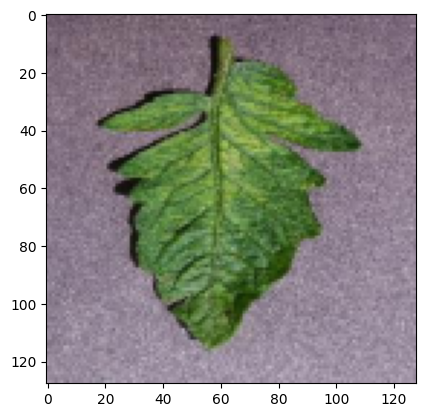

In [11]:
print(a.shape)
plt.subplot(1,1,1)
plt.imshow(a,cmap='bone')
plt.show()

(128, 128, 3)


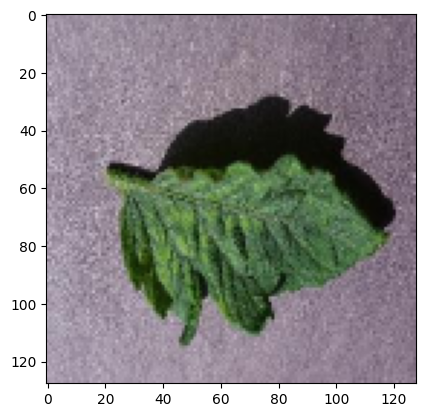

In [12]:
from skimage.transform import rotate
print(b.shape)
plt.subplot(1,1,1)
plt.imshow(rotate(b,180))
plt.show()

In [ ]:
x_train =x_train/255.0 -0.5
x_test = x_test/255.0 -0.5
NUM_CLASSES = 10
img_wh = 256

In [11]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train_ohe))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test_ohe))

2022-11-26 19:49:36.971472: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15389 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:06:00.0, compute capability: 6.0


In [192]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(
    x_train, y_train_ohe, test_size=0.2, random_state=42,stratify=y_train)

# X_train, X_val = X_train / 255.0+0.5, X_val / 255.0+0.5
# x_test = x_test / 255.0+0.5

In [24]:
x_train =x_train/255.0 -0.5
x_test = x_test/255.0 -0.5
NUM_CLASSES = 10
img_wh = 256
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=180, # used, Int. Degree range for random rotations.
    width_shift_range=0.2, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.2, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0.1, # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.4,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    brightness_range=[20,100],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None)


/users/sbataju/.conda/envs/tf_gpu/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
datagen.fit(x_train)

In [ ]:
datagen.fit(x_train)
tmps = datagen.flow(x_train, y_train_ohe, batch_size=1)

for tmp in tmps:
    imshow(tmp[0].squeeze(),cmap='bone')
    plt.title(label[np.argmax(tmp[1])])
    break

In [23]:
x_train.shape
img_wh=256

In [31]:
int(len(x_train)/32)

312

In [32]:
%%time 

cnn = Sequential()

# let's start with an AlexNet style convolutional phase
cnn.add(Conv2D(filters=32,
                input_shape = (img_wh,img_wh,3),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu', data_format="channels_last")) # more compact syntax

# no max pool before next conv layer!!
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(NUM_CLASSES, activation='softmax'))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])
cnn.summary()
# the flow method yields batches of images indefinitely, with the given transformations
cnn.fit_generator(datagen.flow(x_train, y_train_ohe, batch_size=64), 
                   steps_per_epoch=int(len(x_train)/64), # how many generators to go through per epoch
                   epochs=5, verbose=1,
                   validation_data=(x_test,y_test_ohe),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
                  )

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128, 128, 64)      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1048576)           0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               134217856 
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

KeyboardInterrupt: 

8000

In [ ]:
plt.figure(figsize=(10,10))
for i,(image_batch, labels_batch) in enumerate(train_ds.shuffle(buffer_size=2)):
#     plt.subplot()
#     print(image_batch.shape)
#     print(labels_batch.shape)
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch)
#     print(label[np.argmax(labels_batch)])
    plt.title(label[np.argmax(labels_batch)])


    if i >= 9: break
#     break
plt.show()




In [96]:
list(label.values())

['Tomato___Tomato_mosaic_virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Leaf_Mold',
 'Tomato___Early_blight',
 'Tomato___Target_Spot',
 'Tomato___Late_blight',
 'Tomato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Septoria_leaf_spot']

In [193]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [98]:
train_ds

<PrefetchDataset shapes: ((128, 128, 3), (10,)), types: (tf.uint8, tf.float32)>

In [99]:
normalization_layer = layers.Rescaling(1./255)

In [194]:
class_names =list(label.values())
num_classes = len(class_names)
print(num_classes)

10


In [202]:
class_names =list(label.values())
num_classes = len(class_names)
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=(256,256,3), num_classes=num_classes)
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [203]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [204]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 256, 256, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 128, 128, 128 3584        rescaling_1[0][0]                
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 128, 128, 128 512         conv2d_4[0][0]                   
____________________________________________________________________________________________

In [205]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [206]:
epochs=10
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(
  X_train,Y_train,
  validation_data=(X_val,Y_val),
  epochs=epochs,
    callbacks=[callback],
#     shuffle=True
)

Epoch 1/10


2022-11-25 23:10:26.807781: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8401


250/250 [==============================] - 157s 531ms/step - loss: 0.9809 - accuracy: 0.6599 - val_loss: 4.6639 - val_accuracy: 0.1070
Epoch 2/10
 91/250 [=========>....................] - ETA: 1:18 - loss: 0.6655 - accuracy: 0.7730

KeyboardInterrupt: 

In [207]:
epochs=3
history_np = model.fit(
  train_ds.shuffle(buffer_size=256).batch(32),
  validation_data=(test_ds),
  epochs=epochs,
    shuffle=True
)

Epoch 1/3
313/313 [==============================] - 166s 528ms/step - loss: 2.0914 - accuracy: 0.6485 - val_loss: 33.6954 - val_accuracy: 0.1000
Epoch 2/3
313/313 [==============================] - 161s 515ms/step - loss: 1.8769 - accuracy: 0.5886 - val_loss: 64.4641 - val_accuracy: 0.1000
Epoch 3/3
313/313 [==============================] - 161s 515ms/step - loss: 2.3683 - accuracy: 0.4596 - val_loss: 3.8241 - val_accuracy: 0.1000


In [81]:
x,y=tf.expand_dims(
    train_ds, axis=-1, name=None
)

ValueError: Attempt to convert a value (<TensorSliceDataset shapes: ((128, 128, 3), (10,)), types: (tf.uint8, tf.float32)>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>) to a Tensor.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(width,
                                  width,
                                  3)),
    layers.RandomRotation(0.9),
    layers.RandomZoom(0.2),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),


  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),


  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model2.summary()

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model2.fit(
  x_train/255.,y_train,
  validation_data=(x_test,y_test),
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
yhat = np.argmax(model2.predict(x_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
cm = mt.confusion_matrix(y_test,yhat)
plt.imshow(cm)
plt.colorbar()
plt.title(f"CM Test ACC: {acc}")
plt.show()

In [ ]:
yhat = np.argmax(model2.predict(x_train), axis=1)
acc = mt.accuracy_score(y_train,yhat)
cm = mt.confusion_matrix(y_train,yhat)
plt.imshow(cm)
plt.colorbar()
plt.title(f"CM Train: {acc}")
plt.show()

In [ ]:
# data_DIR="/users/sbataju/CS5324/tomato/data_arg/"
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0.2, # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.1,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None)

datagen.fit(X_train)


In [ ]:
tmps = datagen.flow(X_train, Y_train, batch_size=1)

for tmp in tmps:
    imshow(tmp[0].squeeze(),cmap='bone')
    plt.title(label[np.argmax(tmp[1])])
    break

In [ ]:
%%time 

cnn = Sequential()

# let's start with an AlexNet style convolutional phase
cnn.add(Conv2D(filters=32,
                input_shape = (width,width,3),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu', data_format="channels_last")) # more compact syntax

# no max pool before next conv layer!!
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(NUM_CLASSES, activation='softmax'))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transformations
epochs=15
history=cnn.fit(datagen.flow(X_train, Y_train, batch_size=32),
         validation_data=datagen.flow(X_val,Y_val, batch_size=8),
         steps_per_epoch=30, epochs=epochs)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()





In [ ]:
yhat = np.argmax(cnn.predict(x_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
cm = mt.confusion_matrix(y_test,yhat)
plt.imshow(cm)
plt.colorbar()
plt.title(f"CM Test ACC: {acc}")
plt.show()

In [ ]:
yhat = np.argmax(cnn.predict(x_train), axis=1)
acc = mt.accuracy_score(y_train,yhat)
cm = mt.confusion_matrix(y_train,yhat)
plt.imshow(cm)
plt.colorbar()
plt.title(f"CM Train ACC: {acc}")
plt.show()

In [ ]:
# what if we just want to use the validation data??
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 
l2_lambda = 0.0001
learning_rate = 0.001

# Use Kaiming He to regularize ReLU layers: https://arxiv.org/pdf/1502.01852.pdf
# Use Glorot/Bengio for linear/sigmoid/softmax: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf 
cnn = Sequential()

cnn.add(Conv2D(filters=32,
               input_shape = (width,width,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',
               data_format="channels_last")) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn.add(Conv2D(filters=16,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
cnn.add(Conv2D(filters=8,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))


# add one layer on flattened output

cnn.add(Flatten())
cnn.add(Dense(1024, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             ))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer=keras.optimizers.Adam(learning_rate=learning_rate), # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
# cnn.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
#                   steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
#                   epochs=50, verbose=1,
#                   validation_data=(X_test,y_test_ohe),
#                   callbacks=[EarlyStopping(monitor='val_loss', patience=2)]
#                  )
print(cnn.summary())

In [ ]:

epochs=10
history = cnn.fit(datagen.flow(X_train, Y_train, batch_size=32),
         validation_data=(X_val,Y_val),verbose=1,
         steps_per_epoch=int(len(x_train))/128, epochs=epochs,callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [ ]:
%%time

from tensorflow.keras.layers import Input, average, concatenate
from tensorflow.keras.models import Model

num_ensembles = 3
l2_lambda = 0.000001

input_holder = Input(shape=(width,width,3))

# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (width,width,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', data_format="channels_last")(input_holder)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')(x)
input_conv = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

branches = []
for _ in range(num_ensembles):
    
    # start using NiN (MLPConv)
    x = Conv2D(filters=32,
                   input_shape = (width,width,3),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='linear', data_format="channels_last")(input_conv)

    x = Conv2D(filters=32,
                   kernel_size=(1,1),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu', data_format="channels_last")(x)
#         model.add(BatchNormalization(axis=-1))

    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)
    
    x = Conv2D(filters=64,
                   input_shape =(width,width,3),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='linear', data_format="channels_last")(x)

    x = Conv2D(filters=64,
                   kernel_size=(1,1),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='linear', data_format="channels_last")(x)
    x = BatchNormalization(axis=-1)(x)


    x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

    # add one layer on flattened output
    x = Flatten()(x)
    x = Dropout(0.50)(x) # add some dropout for regularization after conv layers
    x = Dense(64, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
            )(x)
    
    x = Dense(NUM_CLASSES, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
             )(x)
    
    # now add this branch onto the master list
    branches.append(x)

# that's it, we just need to average the results
x = concatenate(branches)

x = Dense(NUM_CLASSES, 
          activation='softmax', 
          kernel_initializer='glorot_uniform',
          kernel_regularizer=l2(l2_lambda)
         )(x)

# here is the secret sauce for setting the network using the 
#   Functional API:
cnn_ens = Model(inputs=input_holder,outputs=x)

cnn_ens.summary()

In [ ]:
# Let's train the model 
cnn_ens.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

In [ ]:

epochs=10
history = cnn_ens.fit(datagen.flow(X_train, Y_train, batch_size=32),
         validation_data=(X_val,Y_val),verbose=1,
         steps_per_epoch=int(len(x_train))/128, epochs=epochs,callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()




In [ ]:
yhat = np.argmax(model2.predict(x_test), axis=1)
acc = mt.accuracy_score(y_test,yhat)
cm = mt.confusion_matrix(y_test,yhat)
plt.imshow(cm)
plt.colorbar()
plt.show()

In [ ]:
model = Sequential()
chanDim=-1
model.add(Conv2D(128, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(258))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(258))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()


In [ ]:
from tensorflow.keras.utils import plot_model

# you will need to install pydot properly on your machine to get this running
plot_model(
    model, show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [ ]:

model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
#     aug = ImageDataGenerator(fill_mode="nearest")
model_history = model.fit(X_train, Y_train, batch_size=32,
validation_data=(X_val, Y_val),
callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
epochs=50, verbose=1)


In [ ]:
scores = model.evaluate(x_test, y_test_ohe)
print("Accuracy is :"+str(scores[1]*100)+" %")

In [ ]:
scores

In [ ]:

plt.plot(model_history.history['loss'],label='loss')
plt.plot(model_history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'],label='accuracy')
plt.plot(model_history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
assert False

In [ ]:
x_test[0].shape

In [ ]:
xx = x_test[0]


In [ ]:
plt.imshow(xx[:, :, 0])
plt.colorbar()
plt.show()

In [ ]:
from sklearn import metrics as mt
EPOCHS = 10
INIT_LR = 1e-4
#to avoid cr4shing due to less ram
BS = 256
default_image_size = tuple((128,128))
width=128
height=128
depth=3
inputShape=(128,128,3)


labels=[
"Tomato___Tomato_mosaic_virus",
"Tomato___Early_blight",
"Tomato___Septoria_leaf_spot",
"Tomato___Bacterial_spot",
"Tomato___Target_Spot",
"Tomato___Spider_mites",
"Tomato___Tomato_Yellow_Leaf_Curl_Virus",
"Tomato___Late_blight",
"Tomato___healthy",
"Tomato___Leaf_Mold"
]
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(np.argmax(y_test, axis=1),yhat)
    cm = mt.confusion_matrix(np.argmax(y_test, axis=1),yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

In [ ]:
%%time

# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 
from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 
NUM_CLASSES = 10
input_holder = Input(shape=(height, width, 3))
l2_lambda = 0.000001
# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (height,width,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES)(x)
x = Activation('softmax')(x)

resnet = Model(inputs=input_holder,outputs=x)

resnet.summary()

In [ ]:
resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
# resnet.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
#                       steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
#                       epochs=50, verbose=1,
#                       validation_data=(X_test,y_test_ohe),
#                       callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
#                      )

resnet.fit(x_train, y_train, batch_size=128, 
                      epochs=50, verbose=1,
                      validation_data=(x_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

In [ ]:
summarize_net(resnet, x_test, y_test, title_text='ResNet')